In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import sys
sys.path.append('/home/chenani/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as pl
import numpy as np
import pickle as pkl
import pandas as pd
import os
from scipy.signal import argrelextrema
from scipy.signal import gaussian
from scipy.stats import pearsonr
from scipy.stats import binom_test
import seaborn as sns
import itertools as it
import fnmatch
import statsmodels.api as sm

/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
def locate(pattern, root=os.curdir):
    '''Locate all files matching supplied filename pattern in and below
        supplied root directory.
    '''
    for path, dirs, files in os.walk(os.path.abspath(root)):
        for filename in fnmatch.filter(files, pattern):
            yield [path,filename]
def findClosestPoint(values,array):
    values = np.array(values)
    array = np.array(array)
    idx = np.array([np.square(array - value).argmin() for value in values])
    return idx,array[idx]
def nanmean(data, **args):
    return np.ma.filled(np.ma.masked_array(data,np.isnan(data)).mean(**args), fill_value=np.nan)
def nanstd(data, **args):
    return np.ma.filled(np.ma.masked_array(data,np.isnan(data)).std(**args), fill_value=np.nan)
sns.set_palette('cubehelix', 8, .75)
c5 = ["#b4943e","#777acd","#60a862","#c45ca2","#cb5a4c"]

No useful data in /home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3903Lesion/dataFiles/subSampling/roRat3903-D4-5.npArr ;-(
No useful data in /home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3903Lesion/dataFiles/subSampling/roRat3903-D4-7.npArr ;-(


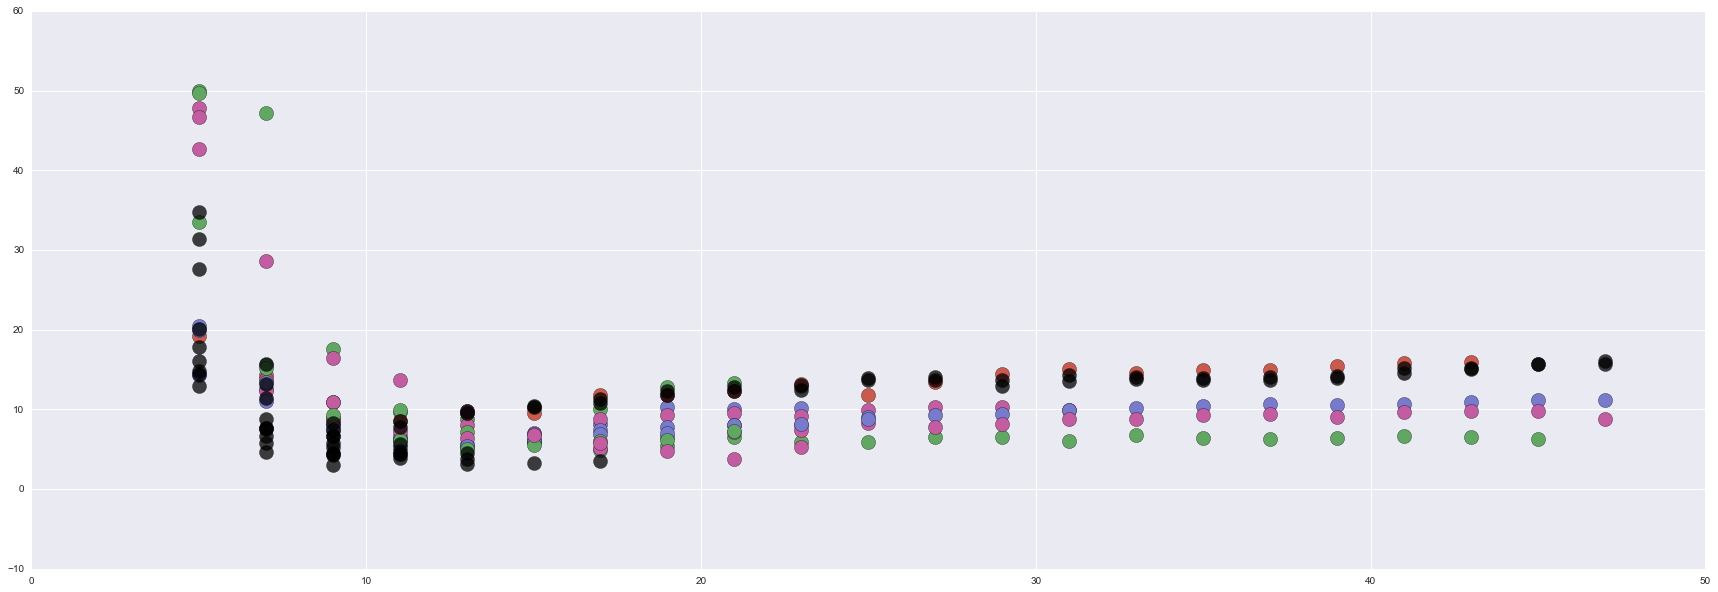

In [8]:
f,ax = pl.subplots(1,1,figsize=[30,10])
dataC = '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/'
dataL = '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/'
roC = sorted([os.path.join(item[0],item[1]) for item in locate('roRat*.npArr',dataC)])
roL = sorted([os.path.join(item[0],item[1]) for item in locate('roRat*.npArr',dataL)])
prcnt_pk_C = np.zeros([len(roC),39])
prcnt_pk_L = np.zeros([len(roL),39])
NsubC = []
for ii,item in enumerate(roC):
    #print item
    clrIdx = int(item.split('D')[1][0])
    NsubC.append(np.abs(int(item.split('.')[0][-2:])))
    lst = pkl.load(open(item,'rb'))
    R_s = 100.0*lst[:,1]/lst[:,0]
    dens = sm.nonparametric.KDEUnivariate(R_s)
    dens.fit('gau', bw='scott', gridsize=100, cut=3, clip=[0,100])
    pl.scatter(NsubC[-1],dens.support[np.argmax(dens.density)],s=200,c=c5[clrIdx])
    prcnt_pk_C[ii,(NsubC[-1]-5)/2]+= dens.support[np.argmax(dens.density)]
NsubL = []
for ii,item in enumerate(roL):
    if item.find('at43e') < 0:
        clrIdx = int(item.split('D')[1][0])
        NsubL.append(np.abs(int(item.split('.')[0][-2:])))
        lst = pkl.load(open(item,'rb'))
        R_s = 100.0*lst[:,1]/lst[:,0]
        dens = sm.nonparametric.KDEUnivariate(R_s)
        try:
            dens.fit('gau', bw='scott', gridsize=100, cut=3, clip=[0,100])
            pl.scatter(NsubL[-1],dens.support[np.argmax(dens.density)],s=200,c='k',alpha=0.75)
            prcnt_pk_L[ii,(NsubL[-1]-5)/2]+= dens.support[np.argmax(dens.density)]
        except ZeroDivisionError:
            print 'No useful data in %s ;-(' %item
#pl.xlim(4,20)    

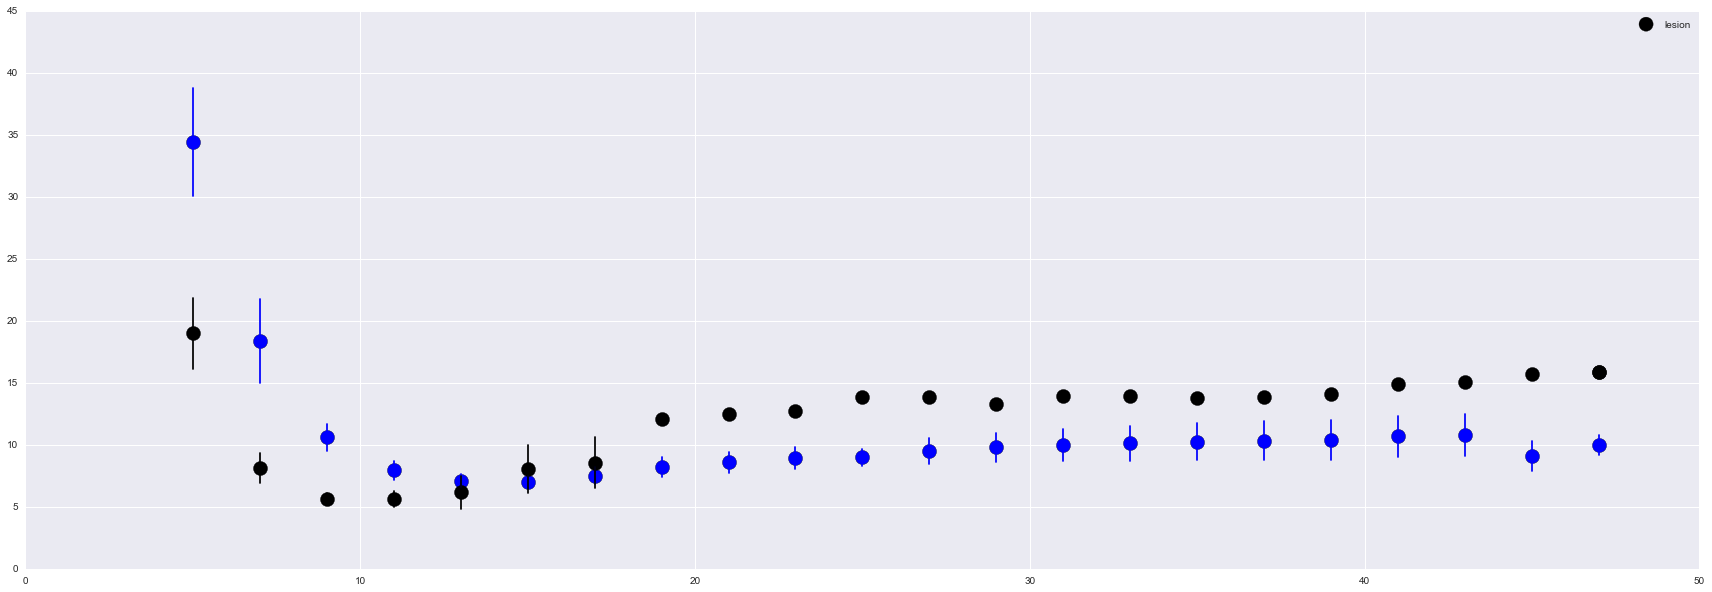

In [9]:
f,ax = pl.subplots(1,1,figsize=[30,10])
for N in sorted(set(NsubC))[:]:
    validSubs =  np.where(np.array(NsubC)== N)[0]
    #print N,validSubs.size
    zeroZZZ   =  np.where(np.array(NsubC)!= N)[0]
    avg = prcnt_pk_C[validSubs,(N-5)/2].mean()
    std = prcnt_pk_C[validSubs,(N-5)/2].std()
    ci = 1.0* std/ np.math.sqrt(validSubs.size)
    pl.plot([N,N],[avg-ci,avg+ci],color='b')
    pl.scatter(N,avg,s=200)
for N in sorted(set(NsubL))[:]:
    validSubs =  np.where(np.array(NsubL)== N)[0]
    #print N,validSubs.size
    zeroZZZ   =  np.where(np.array(NsubL)!= N)[0]
    avg = nanmean(prcnt_pk_L[validSubs,(N-5)/2])
    std = nanstd(prcnt_pk_L[validSubs,(N-5)/2])
    ci = 1.0* std/ np.math.sqrt(validSubs.size)
    pl.plot([N,N],[avg-ci,avg+ci],color='k')
    pl.scatter(N,avg,s=200,c='k')
pl.scatter(sorted(set(NsubL))[-1],avg,s=200,c='k',label='lesion')
#pl.xlim(4,19.5)
pl.legend()

In [10]:
roL

['/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3656Lesion/dataFiles/subSampling/roRat3656-D1-5.npArr',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3656Lesion/dataFiles/subSampling/roRat3656-D1-7.npArr',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3656Lesion/dataFiles/subSampling/roRat3656-D1-9.npArr',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3656Lesion/dataFiles/subSampling/roRat3656-D2-11.npArr',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3656Lesion/dataFiles/subSampling/roRat3656-D2-13.npArr',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3656Lesion/dataFiles/subSampling/roRat3656-D2-5.npArr',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/lesion/Rat3656Lesion/dataFiles/subSampling/roRat3656-D2-7.npArr',
 '/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/